In [1]:
import pandas as pd
import numpy as np
import json
import re
from tqdm.notebook import tqdm
import pymongo
from collections import Counter


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import defaultdict
import pycountry
import plotly.express as px


In [3]:
df = pd.read_csv("demo_fmonth/demo_fmonth_1_Data.csv")
# change the string type to float and replace Null value with 0
df.Value = df.Value.apply(lambda x: 0 if x == ":" else float(x.replace(",","")))
df.head()

,TIME,GEO,MONTH,UNIT,Value,Flag and Footnotes
0,2011,Belgium,January,Number,10759.0,NaN
1,2011,Belgium,February,Number,9739.0,NaN
2,2011,Belgium,March,Number,10725.0,NaN
3,2011,Belgium,April,Number,10268.0,NaN
4,2011,Belgium,May,Number,11116.0,NaN


In [4]:
months  = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
 'September', 'October', 'November', 'December']



In [5]:
df.GEO.unique()

array(['Belgium', 'Bulgaria', 'Czechia', 'Denmark',
       'Germany (until 1990 former territory of the FRG)',
       'Germany including former GDR', 'Estonia', 'Ireland', 'Greece',
       'Spain', 'France', 'France (metropolitan)', 'Croatia', 'Italy',
       'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta',
       'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania',
       'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'Iceland',
       'Liechtenstein', 'Norway', 'Switzerland', 'United Kingdom',
       'Montenegro', 'North Macedonia', 'Albania', 'Serbia', 'Turkey',
       'Andorra', 'Belarus', 'Bosnia and Herzegovina',
       'Kosovo (under United Nations Security Council Resolution 1244/99)',
       'Moldova', 'Monaco', 'Russia', 'San Marino', 'Ukraine', 'Armenia',
       'Azerbaijan', 'Georgia'], dtype=object)

In [6]:
# total birth of each month of country 
monthly_birth_rate = defaultdict(int)
for index, row in df.iterrows():
#     if row["GEO"].lower() == "italy":
        month = "{}_{}".format(row["TIME"],row["MONTH"])
        monthly_birth_rate[month] += row['Value']
list(monthly_birth_rate.items())[0]

('2011_January', 911256.0)

In [7]:
# put the months of each year in order 
ordered_months = []
for year in range(2011,2022):
    for m in range(len(months)):
        month_name = months[m]
        month = "{}_{}".format(year,month_name)
        # select only months exist in both data
        if month in  monthly_birth_rate:
            ordered_months.append(month) 
# ordered_months

<BarContainer object of 120 artists>

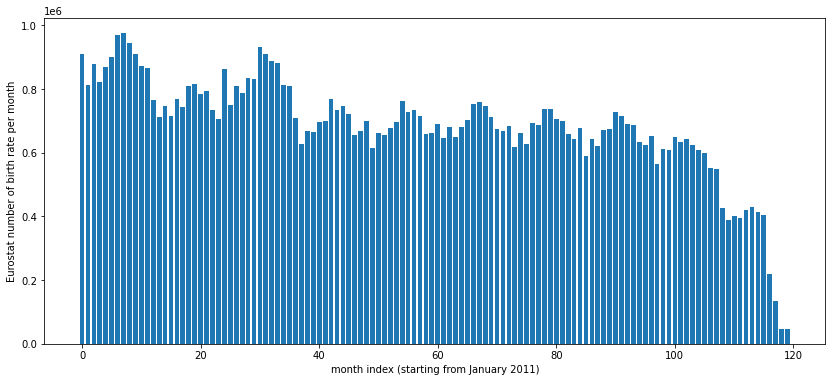

In [8]:
# show the number of birth each month 
x = ordered_months
height = [monthly_birth_rate[month] for month in x]
plt.figure(figsize=(14,6))
plt.xlabel("month index (starting from January 2011)")
plt.ylabel("Eurostat number of birth rate per month")
plt.bar(x = list(range( len(x))),height = height)

In [9]:
eu_countries = df.GEO.unique().tolist()
# eu_countries

In [10]:
alpha3s = {}
isoCods = {}
for country in pycountry.countries:
    alpha3s[country.name] = country.alpha_3
    isoCods[country.name] = country.alpha_2


In [17]:

def plot_map(dd_df, title):
    hover_text = []
    for index, row in dd_df.iterrows():
        hover_text.append((f"country: {row['country']}<br>birth-rates: {row['birth-rates']}\
                          <br>country code: {row['iso']}<br>country alpha3: {row['alpha3']}"))
    dd_df['hover_text'] = hover_text

    fig = px.choropleth(dd_df, 
                        locations="alpha3",
                        hover_name='hover_text',
                        color="birth-rates",
                        projection="natural earth",
                        color_continuous_scale=px.colors.sequential.Plasma,
                        width=900, height=700)
    fig.update_geos(   
        showcoastlines=True, coastlinecolor="DarkBlue",
        scope =  "europe",
        resolution = 110,
        visible = False,
        showland=True, landcolor="LightGrey",
        showocean=True, oceancolor="LightBlue",
        showlakes=True, lakecolor="Blue",
        showrivers=True, rivercolor="Blue",
        showcountries=True, countrycolor="DarkBlue"
    )
    fig.update_layout(title = title, geo_scope="world")
    fig.show()  

In [18]:
countries_birth_rate = defaultdict(int)
for index,row in df.iterrows():
    c = row["GEO"]
    value = row["Value"]
    countries_birth_rate[c]+=value
    

In [19]:
d = {"country":[],"birth-rates":[],"alpha3":[],"iso":[]}
for c in eu_countries:
    if c in alpha3s:
        alpha3_ = alpha3s.get(c)
        d["country"].append(c)
        d["birth-rates"].append(countries_birth_rate[c])
        d["alpha3"].append(alpha3_)
        d["iso"].append(isoCods.get(c))
eu_df = pd.DataFrame(d)
eu_df.head()

,country,birth-rates,alpha3,iso
0,Belgium,1184652.0,BEL,BE
1,Bulgaria,651372.0,BGR,BG
2,Czechia,1051738.0,CZE,CZ
3,Denmark,579910.0,DNK,DK
4,Estonia,132517.0,EST,EE


In [20]:
plot_map(eu_df, "Birth rate per country (where country is specified)")


In [22]:
eu_df.to_csv("eu_viz_data.csv",index=False)